In [1]:
import joblib
import shap

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data_rf = joblib.load("../experiments/random_forest/shap_rf.pkl")
shap_values_rf = data_rf["shap_values"]
X_test_rf = data_rf["X_test"]
features_rf = data_rf["features"]

data_mlp = joblib.load("../experiments/mlp/shap_mlp.pkl")
shap_values_mlp = data_mlp["shap_values"]
X_test_mlp = data_mlp["X_test"]
features_mlp = data_mlp["features"]

data_lgbm = joblib.load("../experiments/light_gbm/shap_lightgbm.pkl")
shap_values_lgbm = data_lgbm["shap_values"]
X_test_lgbm = data_lgbm["X_test"]
features_lgbm = data_lgbm["features"]

In [ ]:
import numpy as np
import pandas as pd

# Exemplo com médias de SHAP
mean_rf = np.abs(shap_values_rf).mean(axis=0)
mean_lgbm = np.abs(shap_values_lgbm).mean(axis=0)

df_shap_mean = pd.DataFrame({
    "feature": data_rf["features"],
    "rf": mean_rf,
    "lgbm": mean_lgbm
}).set_index("feature")

# Correlação de Spearman entre os rankings
print(df_shap_mean.corr(method="spearman"))

KeyError: 'feature_names'

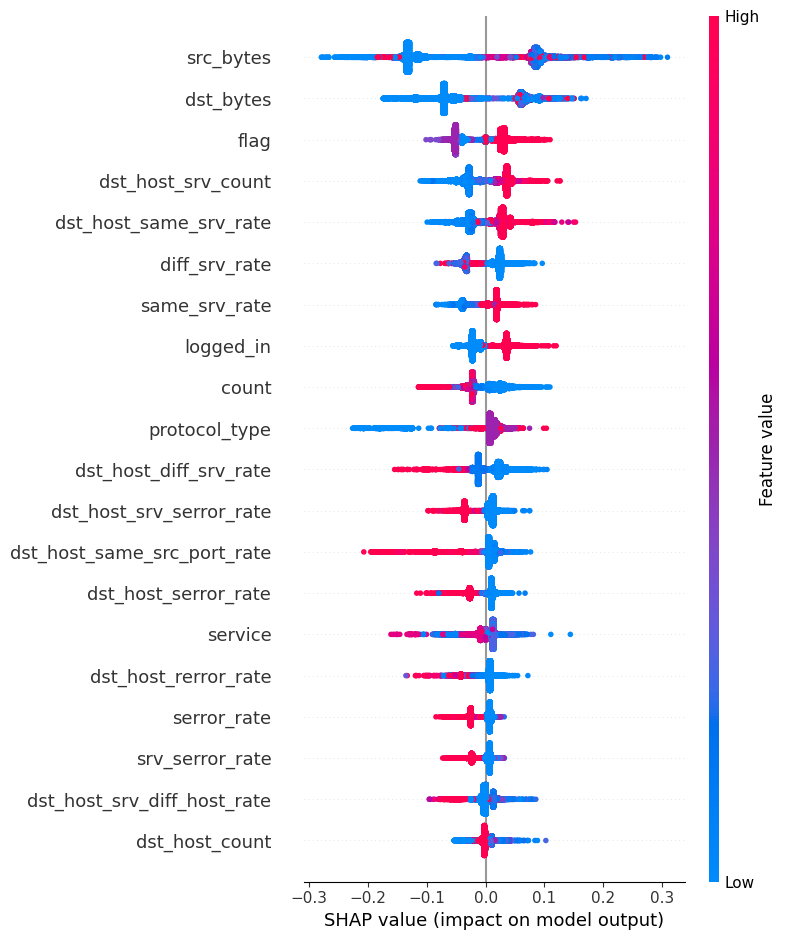

In [4]:
shap.summary_plot(shap_values_rf, X_test_rf, feature_names=features_rf)

<Figure size 640x480 with 0 Axes>

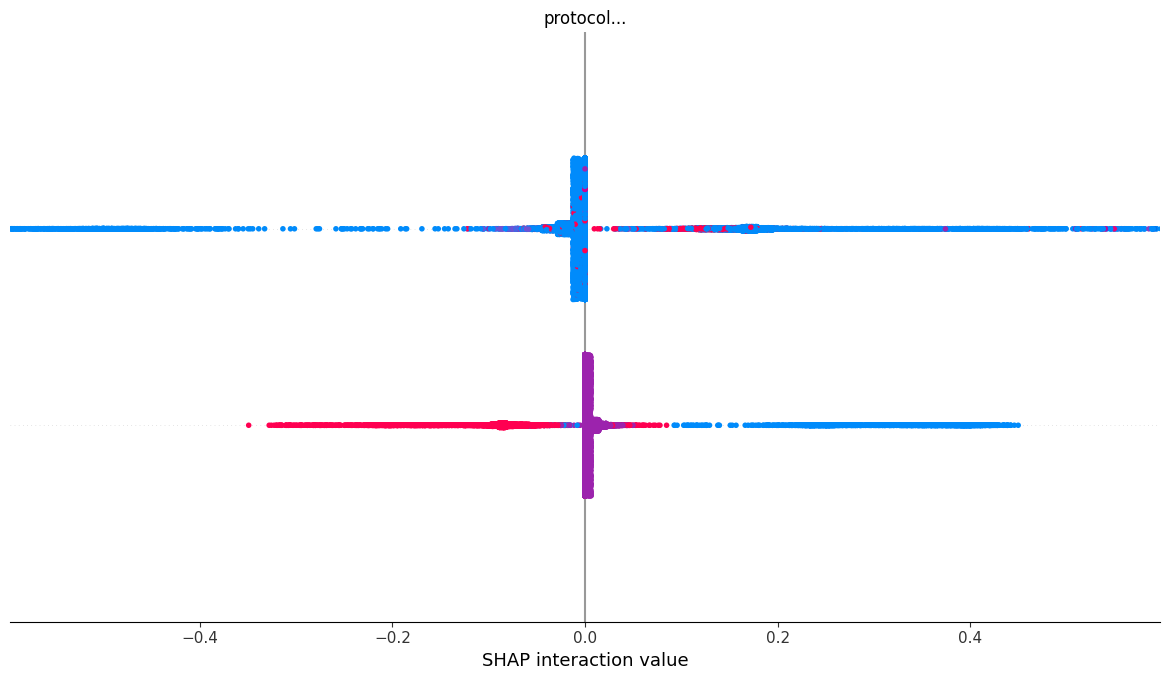

In [5]:
shap.summary_plot(shap_values_mlp, X_test_mlp, feature_names=features_mlp)

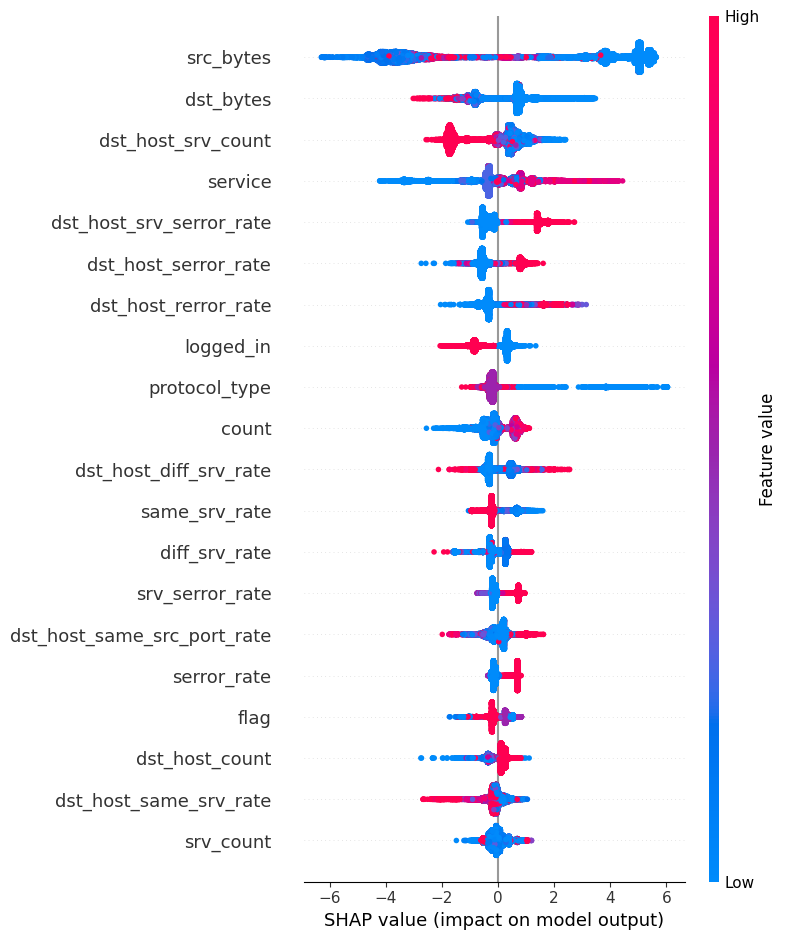

In [6]:
shap.summary_plot(shap_values_lgbm, X_test_lgbm, feature_names=features_lgbm)

In [ ]:
shap.dependence_plot(
    "srv_count",
    shap_values_rf,
    X_test_rf,
    interaction_index="src_bytes"  # cor será baseada nesse atributo
)